# Mineral Ores in India

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import geopandas as geo
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv("./datasets/dataset1.csv")
df.head()

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",...,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",NaN,"Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",Underground,NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,NaN,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,NaN,Mica Schist,NaN


In [4]:
from shapely.geometry import Polygon,Point
import geoplot
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))

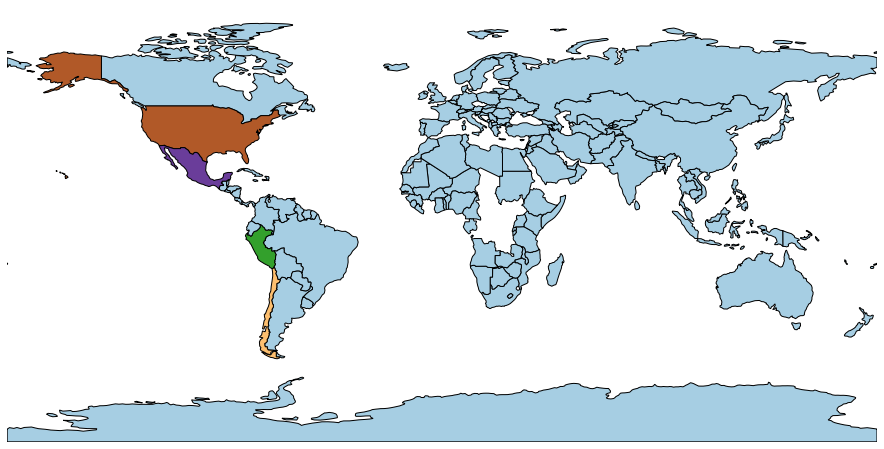

In [5]:
world1=df["country"].value_counts().to_frame().reset_index()
world1["index"]=world1["index"].replace({"United States":'United States of America'})
world1=world1.rename(columns={"index":"name"})
world=world[["name","geometry"]].merge(world1,on="name")

import mapclassify
site_counts = world["country"]
scheme = mapclassify.MaximumBreaks(site_counts)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=site_counts, scheme=scheme,
    cmap='Paired', figsize=(16, 8)
)
plt.show()

US, Mexico, Chile, Peru and Argentina have the most number of sites.


### Sites in India

In [8]:
india_df=df[df["country"]=="India"]
india_df=india_df.reset_index().drop(columns=["index"])
india_df.head() # taking india's ores only.
india_df["state"]=india_df['state'].replace({'Orissa': 'Odisha', 'Tamil Nadu [Madras]': 'Tamil Nadu'})

In [11]:
shp_gdf = geo.read_file('./datasets/India States/Indian_states.shp')
gdf = geo.GeoDataFrame(
    india_df.iloc[:,:5], geometry=geo.points_from_xy(india_df.iloc[:,:5].longitude, india_df.iloc[:,:5].latitude))

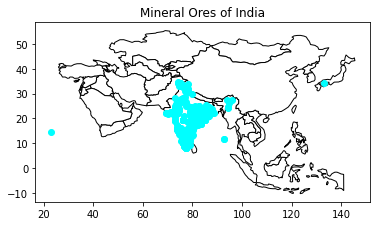

In [16]:
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))

# Asia.
ax = world[world.continent == 'Asia'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='cyan')

plt.title("Mineral Ores of India")

plt.show()

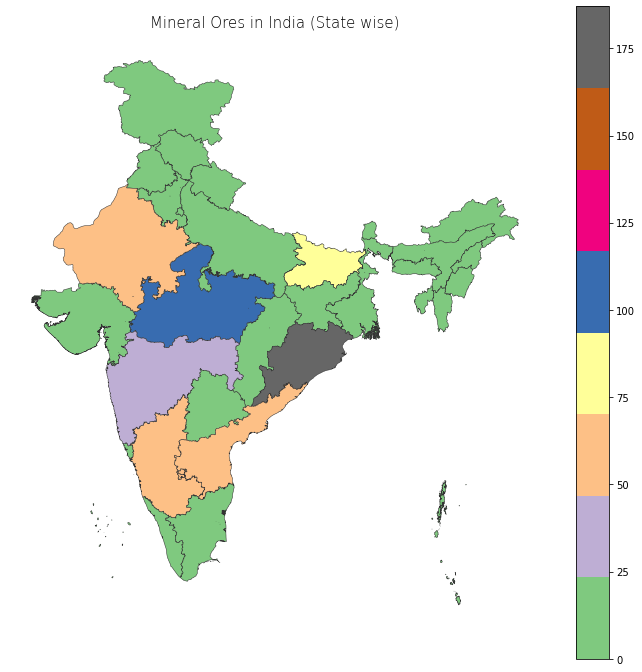

In [19]:
indian_1=india_df["state"].value_counts().to_frame()
indian_1=indian_1.reset_index().rename(columns={"index":"state","state":"mineral_ore_present"})

merged = shp_gdf.set_index('st_nm').join(indian_1.set_index('state')).fillna(0)
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Mineral Ores in India (State wise)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='mineral_ore_present', cmap='Accent', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

### Statewise Detailed Statistics

In [20]:
india_=india_df.loc[:,["state","commod1","commod2","commod3"]]
melted_df=pd.melt(india_, id_vars =['state'], value_vars =['commod1',"commod2","commod3"])
new_df=melted_df.drop_duplicates().dropna()[["state","value"]];
new_df1=new_df.set_index(["state"]).sort_index()
import re
new_df1["Minerals_present"]=[re.split(r"[-;,.\s]\s*", i) for i in new_df1["value"]]
new_df2=new_df1.reset_index().groupby("state")["Minerals_present"].sum()
new_df3=new_df2.to_frame().reset_index()
new_df3["Minerals_present"]=[list(set(i)) for i in new_df3["Minerals_present"]]
new_df3["Count_of_minerals"]=[len(i) for i in new_df3["Minerals_present"]]
from IPython.display import HTML
HTML(new_df3.loc[:,["state","Minerals_present"]].to_html(classes='table table-striped'))

,state,Minerals_present
0,Andhra Pradesh,"[Phosphorus, Manganese, Titanium, Ferrochrome, Phosphates, Iron, Vanadium, Silica, Barium, Zinc, Gold, Refinery, Acid, Barite, Metal, Chromium, Sulfur, Sulfuric, Nickel, Graphite, Refiner, Copper, Cobalt, Aluminum, Lead, Silver]"
1,Assam,"[Iridium, Copper, Osmium, Gold, Platinum]"
2,Bihar,"[Phosphorus, Manganese, Uranium, Selenium, Phosphates, Iron, Silica, Zinc, Gold, Acid, Kyanite, Sulfur, Molybdenum, Sulfuric, Nickel, Graphite, Copper, Stone, Aluminum, Lead, Silver]"
3,"Bihar, Orissa","[Iron, Vanadium, Titanium]"
4,Goa,"[Iron, Manganese]"
5,Gujarat,"[Phosphorus, Fluorine, Phosphates, Iron, Manganese, Fluorite, Copper, Silica, Titanium, Zinc, Aluminum, Lead]"
6,Himachal Pradesh,"[Iron, Silica, Titanium, Copper]"
7,Jammu and Kashmir,"[Gypsum, Sulfate, Boron, Ash, Sulfur, Soda, Copper, Borates, Halite, Anhydrite, Lead, Sodium]"
8,Karnataka,"[Phosphorus, Metal, Chromium, Ferrochrome, Phosphates, Sulfur, Iron, Manganese, Zirconium, Copper, Contained, or, Silica, Garnet, Titanium, Gold, Aluminum]"
9,Kerala,"[Phosphorus, Metal, Kyanite, Phosphates, Thorium, Iron, Zirconium, Contained, or, Silica, REE, Garnet, Titanium, Zinc, Pigment, Aluminum]"
